# 1、冒泡排序
+ 冒泡排序（Bubble Sort）也是一种简单直观的排序算法。它重复地走访过要排序的数列，一次比较两个元素，如果他们的顺序错误就把他们交换过来。走访数列的工作是重复地进行直到没有再需要交换，也就是说该数列已经排序完成。这个算法的名字由来是因为越小的元素会经由交换慢慢“浮”到数列的顶端。

+ 冒泡排序还有一种优化算法，就是立一个 flag，当在一趟序列遍历中元素没有发生交换，则证明该序列已经有序。但这种改进对于提升性能来说并没有什么太大作用。

### 算法步骤

+ 比较相邻的元素。如果第一个比第二个大，就交换他们两个。
+ 对每一对相邻元素作同样的工作，从开始第一对到结尾的最后一对。这步做完后，最后的元素会是最大的数。
+ 针对所有的元素重复以上的步骤，除了最后一个。
+ 持续每次对越来越少的元素重复上面的步骤，直到没有任何一对数字需要比较。

In [1]:
import time

In [2]:
def BubbleSort(ls):
    '''
    :ls : 待排序数组
    '''
    length = len(ls)
    if length <= 1: return ls
    for i in range(length):
        # 因为每次都有最大得元素到最后了，因此内层循环减去上层循环（上层循环代表了固定得个数）
        for j in range(length-i-1): 
            if ls[j] > ls[j+1]:
                ls[j],ls[j+1] = ls[j+1],ls[j]
    return ls

In [3]:
BubbleSort([1,3,2,7,5,8])

[1, 2, 3, 5, 7, 8]

In [4]:
def BubbleSortFlag(ls):
    '''
    :ls : 待排序数组
    :增加 flag 优化
    '''
    length = len(ls)
    if length <= 1: return ls
    flag = False
    for i in range(length):
        # 因为每次都有最大得元素到最后了，因此内层循环减去上层循环（上层循环代表了固定得个数）
        for j in range(length-i-1): 
            if ls[j] > ls[j+1]:
                ls[j],ls[j+1] = ls[j+1],ls[j]
                flag = True
        if flag:
            return ls
    return ls

In [5]:
BubbleSort([1,3,2,7,5,8])

[1, 2, 3, 5, 7, 8]

# 2、选择排序
+ 选择排序是一种简单直观的排序算法，无论什么数据进去都是 O(n²) 的时间复杂度。所以用到它的时候，数据规模越小越好。唯一的好处可能就是不占用额外的内存空间了吧。

### 算法步骤
+ 首先在未排序序列中找到最小（大）元素，存放到排序序列的起始位置
+ 再从剩余未排序元素中继续寻找最小（大）元素，然后放到已排序序列的末尾
+ 重复第二步，直到所有元素均排序完毕。

In [6]:
def SelectionSort(ls):
    '''
    :ls : 待排序数组
    '''
    length = len(ls)
    if length <= 1:
        return ls
    for i in range(length):
        for j in range(i,length):
            # 从小到大排序 ls[i] > ls[j]
            # 从大到小排序 ls[i] < ls[j]
            if ls[i] > ls[j]:
                ls[i],ls[j] = ls[j],ls[i]
    return ls

In [7]:
SelectionSort([1,3,2,7,5,8])

[1, 2, 3, 5, 7, 8]

# 3、插入排序
+ 插入排序的代码实现虽然没有冒泡排序和选择排序那么简单粗暴，但它的原理应该是最容易理解的了，因为只要打过扑克牌的人都应该能够秒懂。插入排序是一种最简单直观的排序算法，它的工作原理是通过构建有序序列，对于未排序数据，在已排序序列中从后向前扫描，找到相应位置并插入。
+ 插入排序和冒泡排序一样，也有一种优化算法，叫做拆半插入。
### 算法步骤
+ 将第一待排序序列第一个元素看做一个有序序列，把第二个元素到最后一个元素当成是未排序序列。
+ 从头到尾依次扫描未排序序列，将扫描到的每个元素插入有序序列的适当位置。（如果待插入的元素与有序序列中的某个元素相等，则将待插入元素插入到相等元素的后面。）

In [8]:
def InsertSort(ls):
    '''
    :ls : 待排序数组
    '''
    length = len(ls)
    if length <= 1:
        return ls
    for i in range(1,length): # 从前往后扫描，i前得都是排好序的
        target = ls[i] # 当前待排序的数字
        j = i
        while j>0 and target<ls[j-1]: # 从后往前扫描，找到合适的位置给target，注意扫描范围是已经排好序的，因此j是从i到0开始扫描
            ls[j] = ls[j-1]
            j -= 1
        ls[j] = target
    return ls

In [9]:
InsertSort([1,3,2,7,5,8])

[1, 2, 3, 5, 7, 8]

# 4、希尔排序
+ 希尔排序，也称递减增量排序算法，是插入排序的一种更高效的改进版本。但希尔排序是**非稳定排序算法**。
+ 希尔排序是基于插入排序的以下两点性质而提出改进方法的：
    + 插入排序在对几乎已经排好序的数据操作时，效率高，即可以达到线性排序的效率；
    + 但插入排序一般来说是低效的，因为插入排序每次只能将数据移动一位；
+ 希尔排序的基本思想是：先将整个待排序的记录序列分割成为若干子序列分别进行直接插入排序，待整个序列中的记录“基本有序”时，再对全体记录进行依次直接插入排序。

### 算法步骤

+ 选择一个增量序列 t1，t2，……，tk，其中 ti > tj, tk = 1；

+ 按增量序列个数 k，对序列进行 k 趟排序；

+ 每趟排序，根据对应的增量 ti，将待排序列分割成若干长度为 m 的子序列，分别对各子表进行直接插入排序。仅增量因子为 1 时，整个序列作为一个表来处理，表长度即为整个序列的长度。

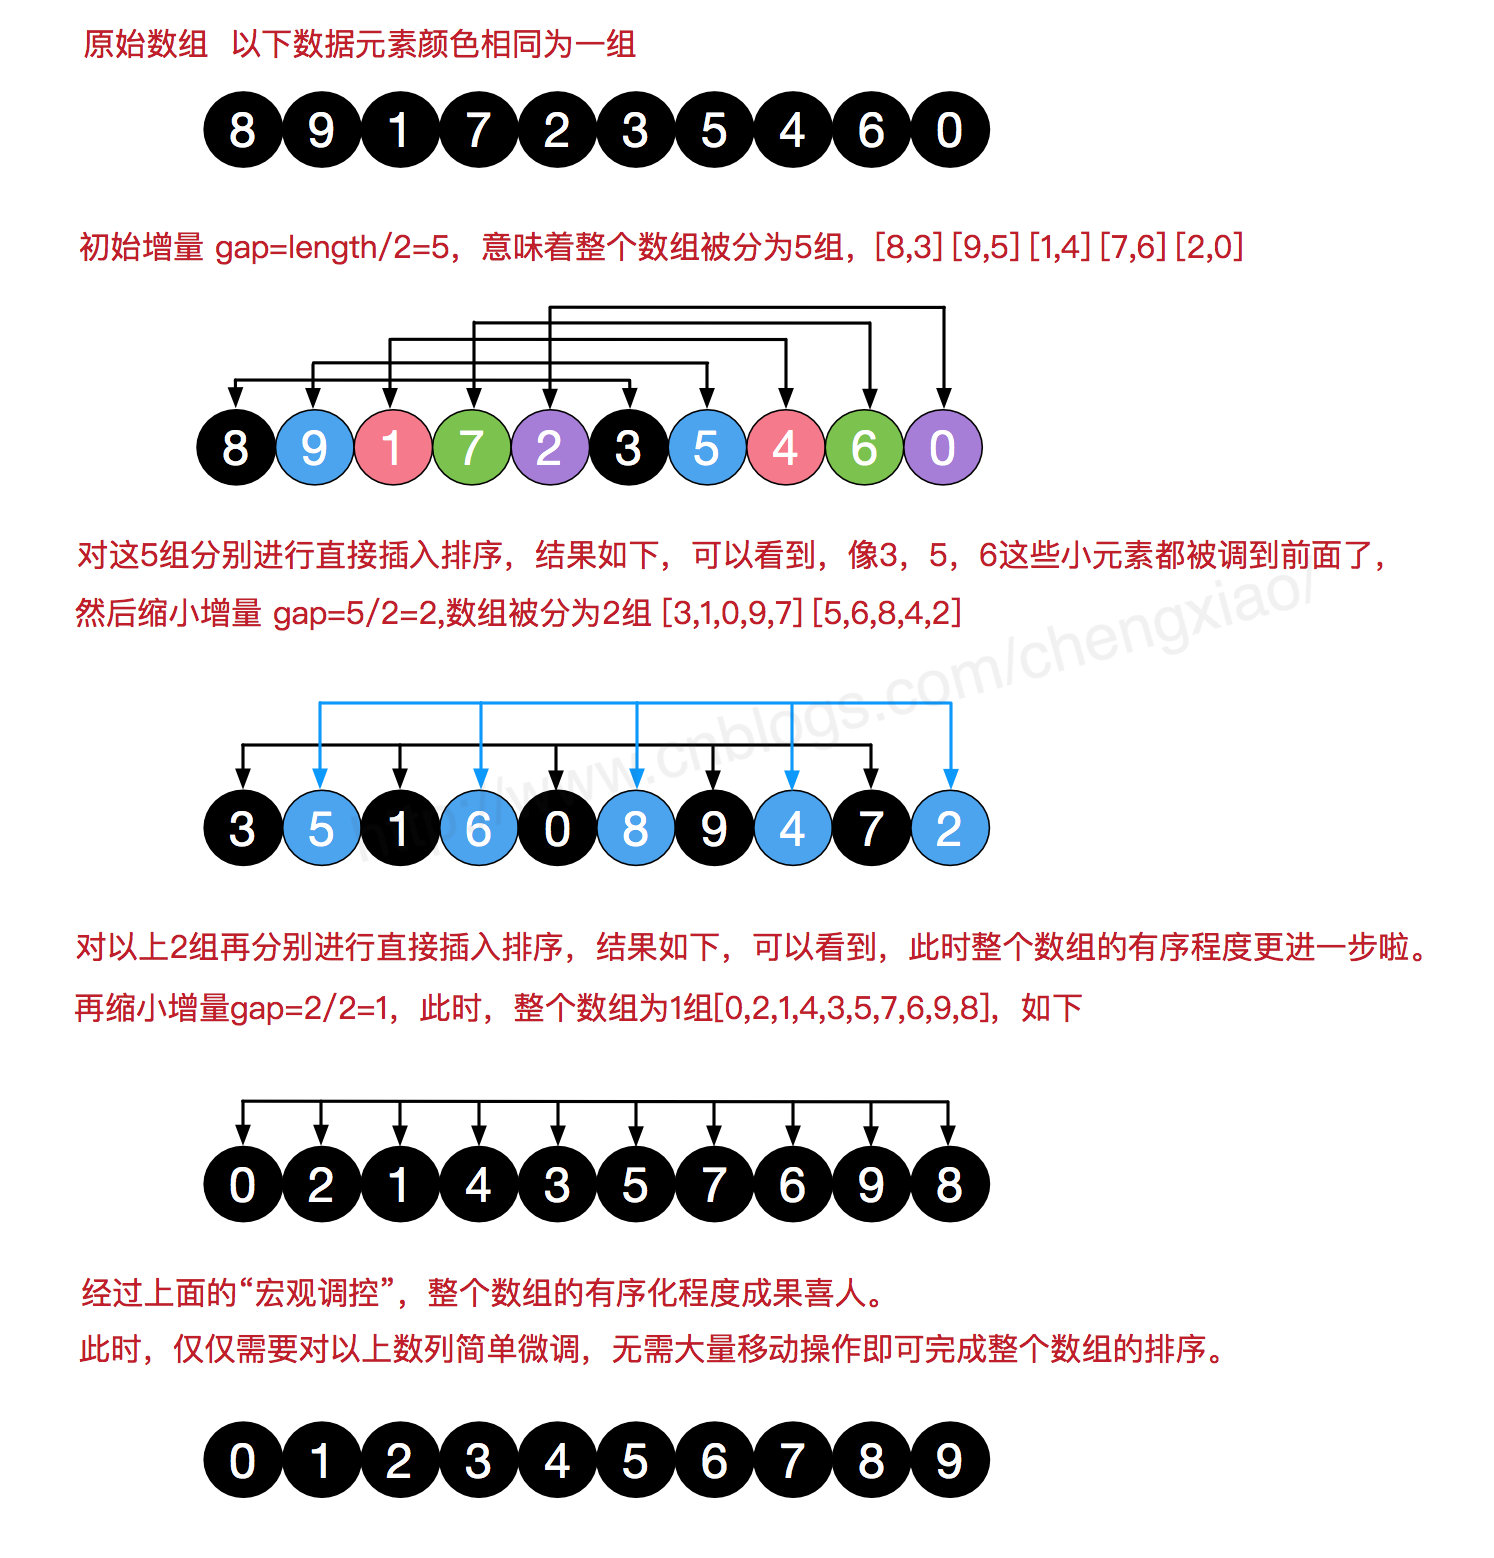

In [10]:
def ShellSort(ls):
    '''
    :ls : 待排序数组
    '''
    def ShellinSort(arr,d):
        '''
        :arr : 原始数组
        :d : 隔 d 个分一组
        '''
        n = len(arr)
        for i in range(d,n):
            j = i-d # 希尔的分组从 j 上看出来
            target = arr[i]
            while j > 0 and target < arr[j]:
                arr[j+d] = arr[j]
                j -= d
            if j != i-d:
                arr[j+d] = target
    
    length = len(ls)
    if length <= 1:
        return ls
    ld = length//2 
    while(ld != 0):
        ShellinSort(ls,ld)
        ld = ld//2
    return ls
    

In [11]:
ShellSort([1,3,2,7,5,8])

[1, 2, 3, 5, 7, 8]

# 5、归并排序
归并排序（Merge sort）是建立在归并操作上的一种有效的排序算法。该算法是采用分治法（Divide and Conquer）的一个非常典型的应用。作为一种典型的分而治之思想的算法应用；和选择排序一样，归并排序的性能不受输入数据的影响，但表现比选择排序好的多，因为始终都是 O(nlogn) 的时间复杂度。代价是需要额外的内存空间。

### 算法步骤

+ 申请空间，使其大小为两个已经排序序列之和，该空间用来存放合并后的序列；
+ 设定两个指针，最初位置分别为两个已经排序序列的起始位置；
+ 比较两个指针所指向的元素，选择相对小的元素放入到合并空间，并移动指针到下一位置；
+ 重复步骤 3 直到某一指针达到序列尾；
+ 将另一序列剩下的所有元素直接复制到合并序列尾。

+ 个人思考
    + 归并排序就是先两两排序，再两两排序的两两排序（四四排序），依次下去

In [12]:
def MergeSort(ls):
    '''
    :ls : 待排序的数组
    '''
    def Merge(arr,left,mid,right):
        '''
        排序数组，按照两两理解 【1，4】【3，5】
                               left，  mid   right
        '''
        temp = [] # 零时保存排序数组
        i = left # 左指针
        j = mid+1 # 右指针，排好序的后半部分的开始指针
        ## 下面这部分就和两个链表和一个链表一样
        while i <= mid and j <= right:
            if arr[i] <= arr[j]:
                temp.append(arr[i])
                i += 1
            else:
                temp.append(arr[j])
                j += 1
        while i <= mid:
            temp.append(arr[i])
            i += 1
        while j <= right:
            temp.append(arr[j])
            j += 1
        for i in range(left,right+1):
            arr[i] = temp[i-left] # 注意temp只保存了left到right的元素，因此要这么赋值
    
    def mSort(arr,left,right):
        '''
        : left :左指针
        : right :右指针
        '''
        if left >= right: # 结束条件,注意是大于
            return 
        mid = (left+right)//2 # 递归折断
        mSort(arr,left,mid) # 递归调用
        mSort(arr,mid+1,right) # 递归调用
        Merge(arr,left,mid,right)

        
    n = len(ls)
    if n <= 1:
        return ls
    mSort(ls,0,n-1)
    return ls

In [15]:
MergeSort([1,3,2,7,5,8])

[1, 2, 3, 5, 7, 8]

# 6.快速排序
+ 快速排序基于选择划分，是简单选择排序的优化。
+ 每次划分将数据选到基准值两边，循环对两边的数据进行划分，类似于二分法。
+ 算法的整体性能取决于划分的平均程度，即基准值的选择，此处衍生出快速排序的许多优化方案，甚至可以划分为多块。
+ 基准值若能把数据分为平均的两块，划分次数O(logn)，每次划分遍历比较一遍O(n)，时间复杂度O(nlogn)。
+ 额外空间开销出在暂存基准值，O(logn)次划分需要O(logn)个，空间复杂度O(logn)
+ 快速排序的最坏运行情况是 O(n²)，比如说顺序数列的快排。但它的平摊期望时间是 O(nlogn)，且 O(nlogn) 记号中隐含的常数因子很小，比复杂度稳定等于 O(nlogn) 的归并排序要小很多。所以，对绝大多数顺序性较弱的随机数列而言，快速排序总是优于归并排序。
### 1. 算法步骤
+ 从数列中挑出一个元素，称为 “基准”（pivot）;
+ 重新排序数列，所有元素比基准值小的摆放在基准前面，所有元素比基准值大的摆在基准的后面（相同的数可以到任一边）。在这个分区退出之后，该基准就处于数列的中间位置。这个称为分区（partition）操作；
+ 递归地（recursive）把小于基准值元素的子数列和大于基准值元素的子数列排序；
+ 递归的最底部情形，是数列的大小是零或一，也就是永远都已经被排序好了。虽然一直递归下去，但是这个算法总会退出，因为在每次的迭代（iteration）中，它至少会把一个元素摆到它最后的位置去。


In [25]:
def QuickSort(ls):
    '''
    :ls : 待排序数组
    '''
    def sort(arr,left,right):
        key = left # 基准坐标
        while left < right:
            while left < right and  arr[key] <= arr[right]: # 一定要先动右指针，先动左指针会报错哦，没想明白啥原因
                right -= 1
            while left < right and arr[key] >= arr[left]: # 接着动左指针
                left += 1
            arr[left],arr[right] = arr[right],arr[left]
        arr[left],arr[key] = arr[key],arr[left]
        return left
    
    def quick(arr,left,right):
        if left >= right:
            return
        mid=sort(arr,left,right) # 找到基准，基准划分两边
        quick(arr,left,mid-1) # 递归调用
        quick(arr,mid+1,right) # 递归调用
    n = len(ls)
    if n <= 1:
        return ls
    quick(ls,0,n-1)
    return ls

In [28]:
QuickSort([1,3,2,7,5,8])

[1, 2, 3, 5, 7, 8]